In [36]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import tensorflow as tf
import keras
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [37]:
# import the dataset
df = pd.read_csv('../data/data.csv')

In [38]:

df.head()

,Text,Polarity
0,আমাদের সজাগ থাকতে হবে টিকা নেওয়া নিয়ে।,1
1,ভ্যাকসিন ভালো না।,0
2,আমার পরিবারের সকলেই টিকা নিয়েছে।,1
3,টিকা লক্ষণীয় রোগ প্রতিরোধে একইভাবে উচ্চ কার্য...,1
4,অনলাইনে আবেদন করে আমি ভ্যাকসিন নিয়েছি।,1


In [39]:
train_sentence,test_sentence,train_label,test_label =sk.model_selection. train_test_split(df['Text'].to_numpy(),df['Polarity'].to_numpy(),test_size=0.2,random_state=42)

In [90]:
from utils.utils import visualize_random_sample, build_model, calculate_results, save_model, load_model, plot_confustion_matrix

In [94]:
visualize_random_sample(df, 'Text', 'Polarity', 10)

Text -> একমাস আগেই 2 টি টিকা নিছি। নিজের আগ্রহতেই টিকা নিয়েছি।
Polarity -> 1
-

Text -> অনুমোদিত ভ্যাকসিনগুলির কোনওটিতেই লাইভ ভাইরাস নেই যা করোনা ঘটায়।
Polarity -> 1
-

Text -> টিকা নিন নিজে ভাল থাকুন পরিবার কে ভাল রাখুন টিকা নিয়ে গুজবে কান দিবেন না
Polarity -> 1
-

Text -> ভ্যাকসিনগুলি প্রতি বছর 2 থেকে 3 মিলিয়ন জীবন বাঁচায় এবং আধুনিক ওষুধের সর্বশ্রেষ্ঠ অগ্রগতির মধ্যে একটি।
Polarity -> 1
-

Text -> সেতু আর উন্নত রাস্তা এই মুহূর্তে বাদ দিয়ে টিকা কিনেন দেশটাকে বাচান
Polarity -> 0
-

Text -> করোনাভাইরাসের স্পাইক প্রোটিন পরিবর্তিত হয়ে যায়।
Polarity -> 0
-

Text -> অল্প জ্বর, পেশীতে ব্যথা, মাথা ধরা এগুলি সবই ভ্যাকসিনের সাইড এফেক্ট, যা নিয়ে ভয় পেতে বারণ করছেন বিশেষজ্ঞরা।
Polarity -> 1
-

Text -> করোনা টিকা দিয়ে আরও অসুস্থ পরে গিয়েছি এর থেকে না নাওয়াই ভাল ছিল।
Polarity -> 0
-

Text -> আমি অবশ্যই টিকাটা সমর্থন করি। আপনারাও টিকা নিবেন।
Polarity -> 1
-

Text -> টিকা যারা সৃষ্টি করছেন তাদের উদ্দেশ্য ভালো না খারাপ
Polarity -> 0
-



Confusion matrix, without normalization
[[208 158]
 [ 87 309]]


{'accuracy': 67.8477690288714,
 'precision': 0.6982306934062451,
 'recall': 0.678477690288714,
 'f1': 0.6825195252887746}

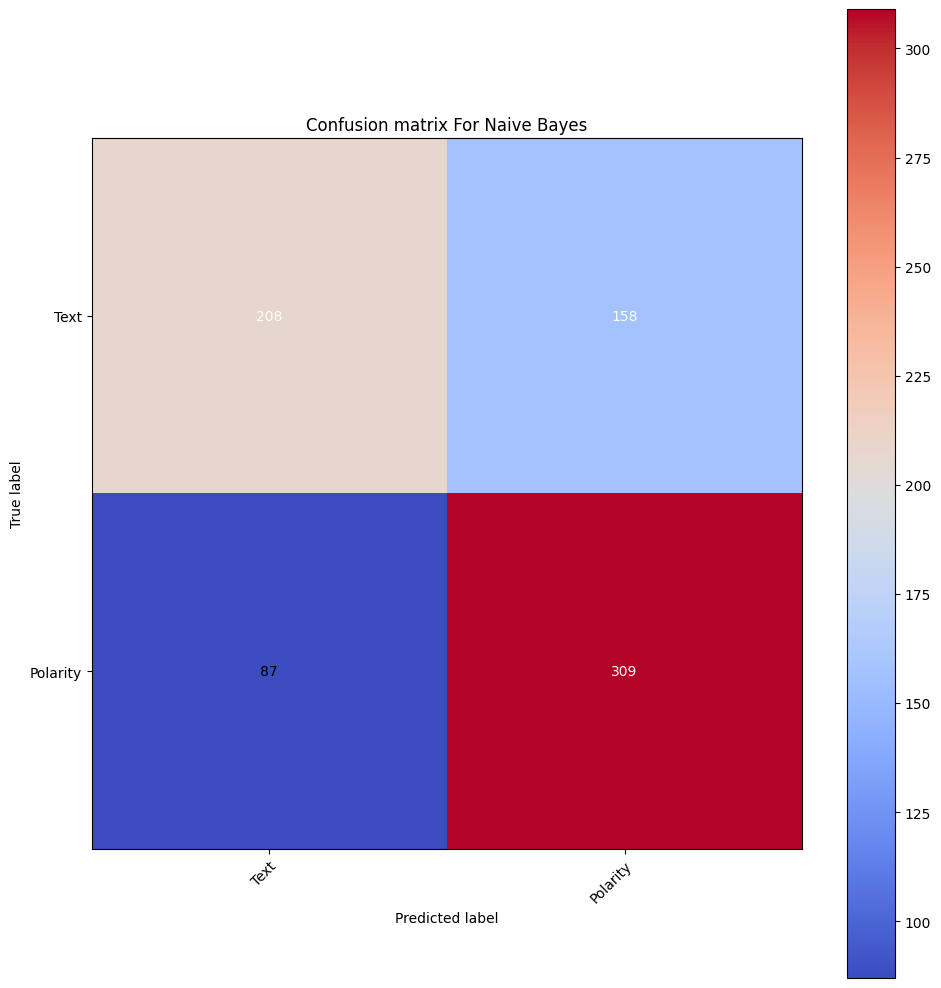

In [97]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

model_mn = build_model(MultinomialNB(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_mn.predict(test_sentence), classes=np.array(['Text', 'Polarity']),
                        title='Confusion matrix For Naive Bayes',
                        # cmap set to coolwarm
                        cmap=plt.cm.coolwarm,
                        
                        
                        )
calculate_results( model_mn.predict(test_sentence),test_label)


Confusion matrix, without normalization
[[260 106]
 [108 288]]


{'accuracy': 71.91601049868767,
 'precision': 0.7191157737175551,
 'recall': 0.7191601049868767,
 'f1': 0.7191329828640872}

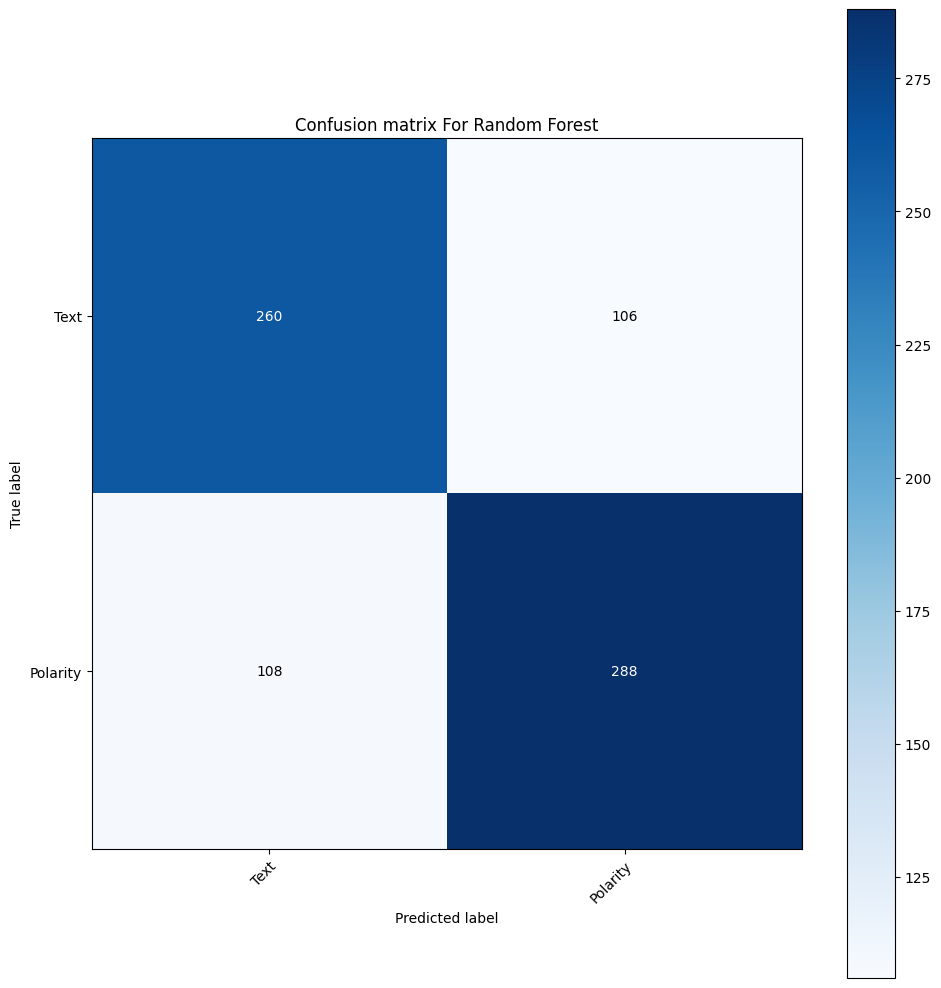

In [83]:

# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = build_model(RandomForestClassifier(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_rf.predict(test_sentence), classes=np.array(['Text', 'Polarity']),
                        title='Confusion matrix For Random Forest',
                    
                        cmap=plt.cm.Blues

                        )
calculate_results( model_rf.predict(test_sentence),test_label)

Confusion matrix, without normalization
[[230 136]
 [ 92 304]]


{'accuracy': 70.07874015748031,
 'precision': 0.7088287461335093,
 'recall': 0.7007874015748031,
 'f1': 0.7024812305438564}

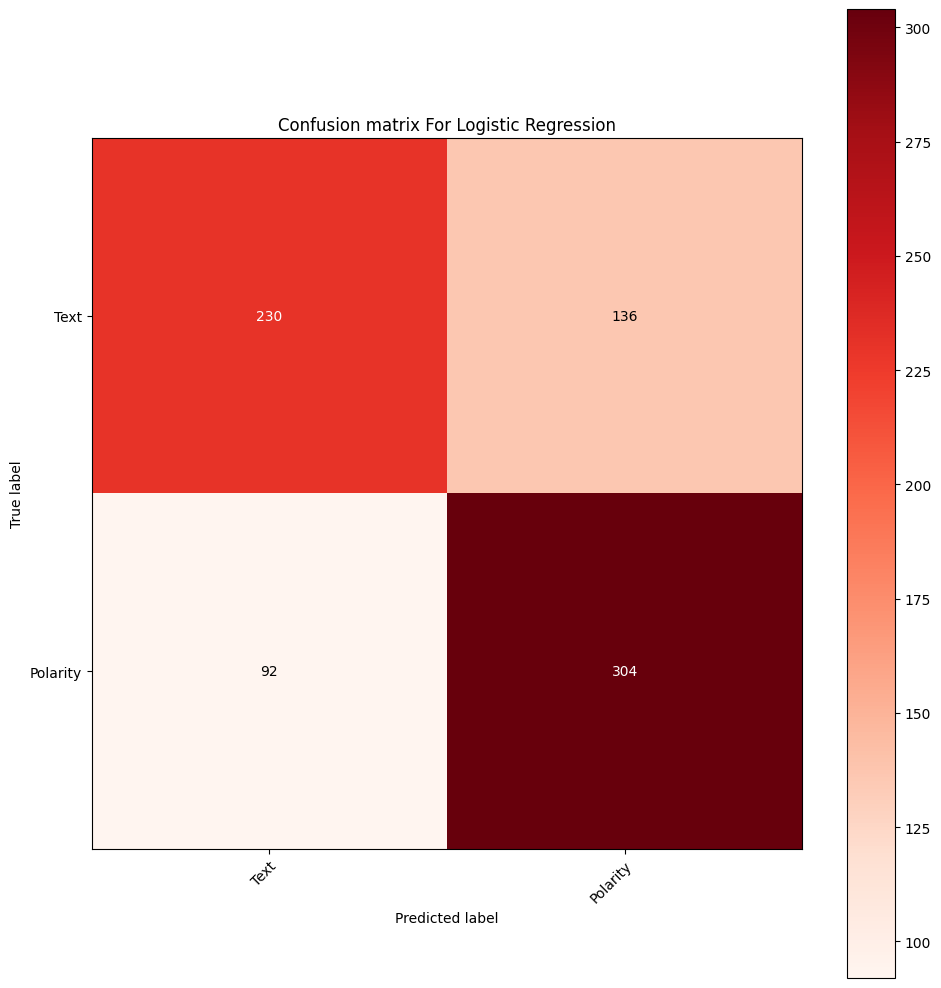

In [84]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = build_model(LogisticRegression(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_lr.predict(test_sentence), classes=np.array(['Text', 'Polarity']),

                        title='Confusion matrix For Logistic Regression',
                        
                        
                        # choose random cmap
                        cmap=plt.cm.Reds,
                        
                        )
calculate_results( model_lr.predict(test_sentence),test_label)

                        


Confusion matrix, without normalization
[[239 127]
 [ 88 308]]


{'accuracy': 71.78477690288713,
 'precision': 0.7242337535676893,
 'recall': 0.7178477690288714,
 'f1': 0.7191662167926416}

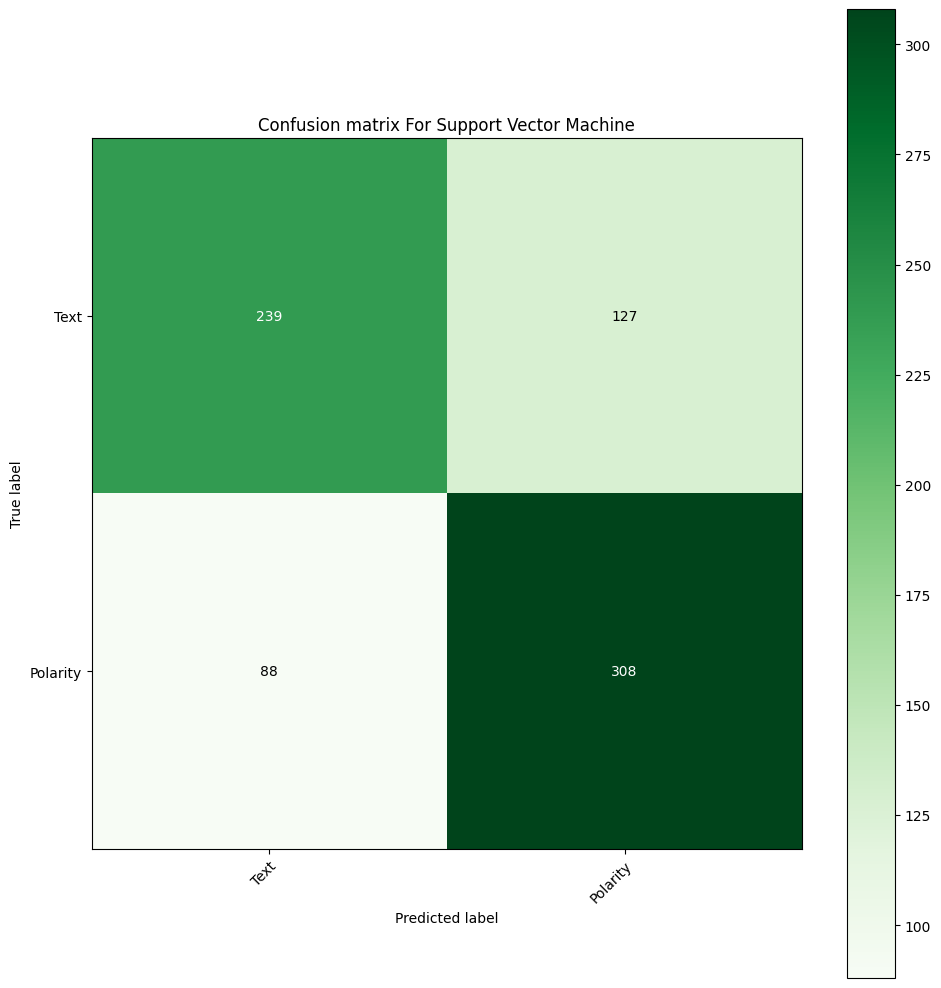

In [85]:
# Support Vector Machine
from sklearn.svm import SVC

model_svm = build_model(SVC(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_svm.predict(test_sentence), classes=np.array(['Text', 'Polarity']),

                        title='Confusion matrix For Support Vector Machine',

                        # choose random cmap
                        cmap=plt.cm.Greens,

                        )
calculate_results( model_svm.predict(test_sentence),test_label)



Confusion matrix, without normalization
[[244 122]
 [129 267]]


{'accuracy': 67.06036745406824,
 'precision': 0.6705340809671517,
 'recall': 0.6706036745406824,
 'f1': 0.6705122567900659}

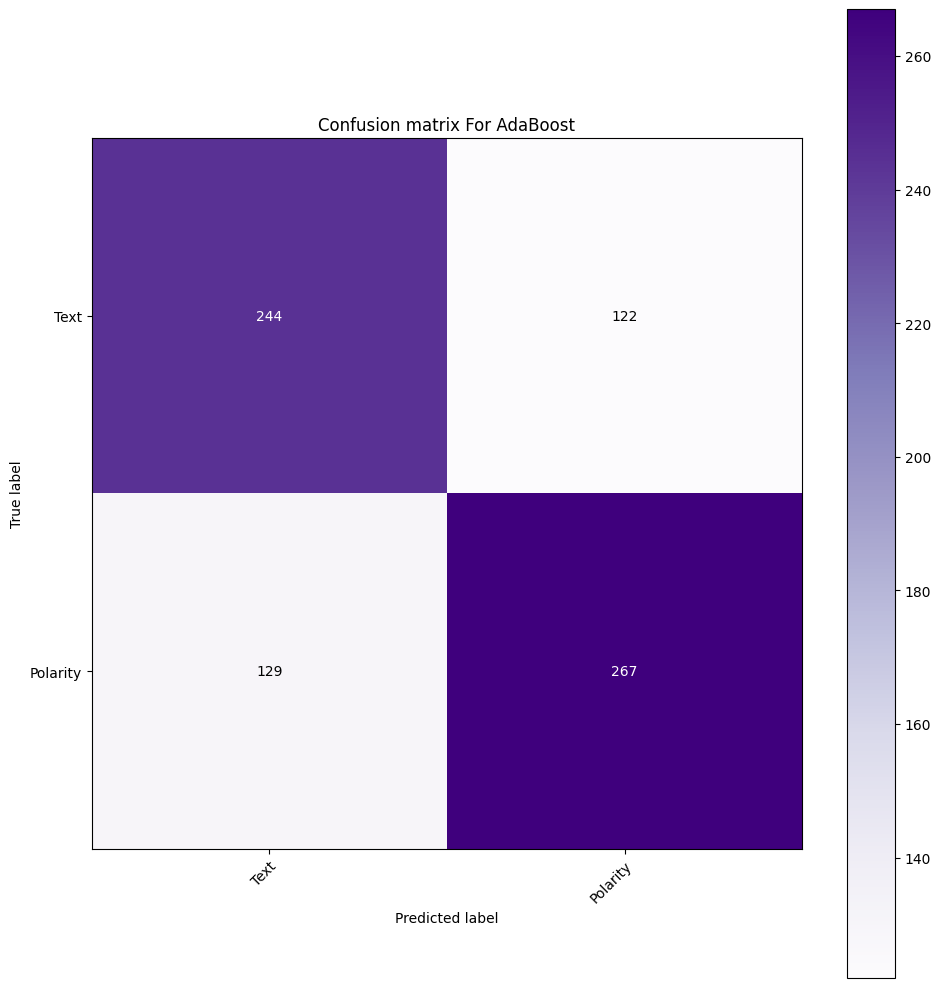

In [88]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ada = build_model(AdaBoostClassifier(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_ada.predict(test_sentence), classes=np.array(['Text', 'Polarity']),
                        title='Confusion matrix For AdaBoost',
                        # choose random cmap
                        cmap=plt.cm.Purples,
                       
                        )
calculate_results( model_ada.predict(test_sentence),test_label)


Confusion matrix, without normalization
[[214 152]
 [ 97 299]]


{'accuracy': 67.32283464566929,
 'precision': 0.6855240260268013,
 'recall': 0.6732283464566929,
 'f1': 0.6758924672484962}

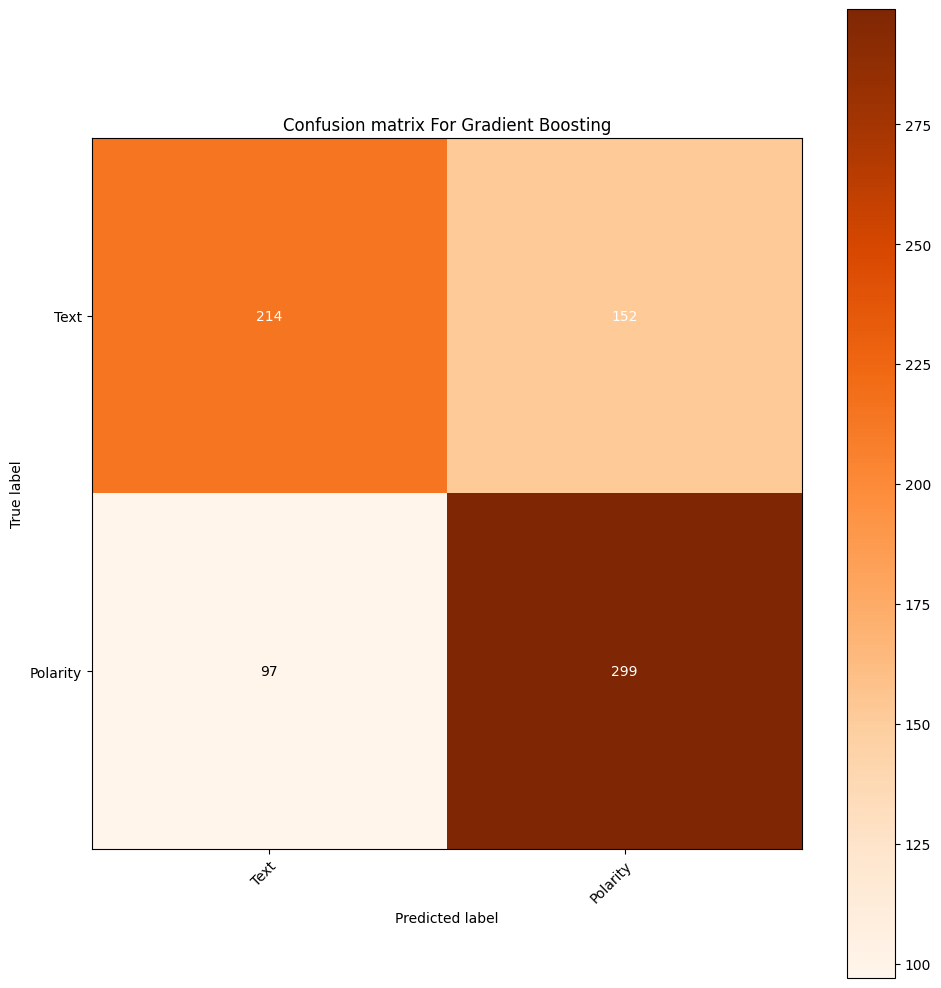

In [98]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = build_model(GradientBoostingClassifier(), train_sentence, train_label)

# Plot non-normalized confusion matrix

plot_confusion_matrix(test_label, model_gb.predict(test_sentence), classes=np.array(['Text', 'Polarity']),

                        title='Confusion matrix For Gradient Boosting',

                        # choose random cmap

                        cmap=plt.cm.Oranges,

                        )

calculate_results( model_gb.predict(test_sentence),test_label)






In [ ]:
# save model
save_model(model_lr, 'model_lr')
save_model(model_rf, 'model_rf')
save_model(model_svm, 'model_svm')
save_model(model_mn, 'model_mn')